# PLAN:
- zbiory danych, podstawowe charakterysytki, loss
- losowanie
- wykresy
- estymacja gęstości za pomocą log-likelihood


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Podstawowe charakterystyki danych

Mamy zbiór $X=(x_i) \subset \mathbb{R}$. Chcemy go w jakimś sensie zrozumieć.

KOMPRESJA: załózmy, że chcielibyśmy zastąpić za pomocą jednego punktu. Czyli chcielibyśmy znaleźć $m$ które najlepiej reprezentuje $X$.

PYTANIE: co to znaczy najlepiej?
Aby na to pytanie odpowiedzieć, musimy określić miarę oceny -- ***loss function***
Po polsku mówi się funkcja kosztu, funkcja straty.

###Propozycja 1###
Loss -- Squarred Error
$$
loss(X;m)=\sum_i |x_i-m|^2.
$$
Minimmalizacja prowadzi do średniej
$$
m=mean(X)=\frac{1}{n}\sum_i x_i.
$$
Czasami (nie do końca poprawnie) używa się oznaczenia $\mathbb{E}(X)$ (wartość oczekiwana $X$).

*Dowód.*
Możemy rozpisać
$$
\sum_i |x_i-m|^2=\sum_i (x_i-m)^2=\sum_i x_i^2-2m \sum_i x_i+nm^2.
$$
Funkcja kwadratowa przyjmuje minimumm w $-b/2a$.
$\Box$


###Propozycja 2###
Loss -- sum of errors
$$
loss(X;m)=\sum_i |x_i-m|.
$$
Minimalizacja prowadzi do mediany.

*Dowód.*
Sortujemy punkty $x_i$ rosnąco, i sprawdzamy jaka jest pochodna. Widać, że pochodna na przedziale $(-\infty,x_0]$ to $-n$, a potem na $(x_n,x_{n-1})$ to $-n+2$, itd. W konsekwencji, dla $x<x_{\lfloor n/2 \rfloor}$ funkcja jest malejąca, dla $x>x_{\lceil n/2 \rceil}$ rosnąca i na przedziale $(\lfloor n/2 \rfloor, \lceil n/2 \rceil)$ stała.
$\Box$


# Wariancja i odchylenie standardowe

Oczywiście ocena za pomodzą jednej wartości może być za prosta -- przykład mierzenia stołu. Istotny jest rozrzut -- odchylenie standardowe i wariancja.

Definiujemy
$$
\mathbb{V}(X)=\frac{1}{n}\sum_i (x_i-\mathbb{E}(X))^2.
$$
Odchylenie standardowe $\sigma(X)$ to pierwiastek z wariancji.

In [ ]:
import mpmath

def rozwinięcie_pi(n):
    mpmath.mp.dps = n + 1  # Ustawienie precyzji na n+1 miejsc po przecinku
    pi_str = str(mpmath.mp.pi).replace('.', '')  # Pobranie rozwinięcia dziesiętnego liczby pi bez kropki
    wektor = [int(cyfra) for cyfra in pi_str[:n]]
    return np.array(wektor)  # Konwersja na wektor numpy

# Przykład użycia
n = int(input("Podaj liczbę cyfr rozwinięcia liczby pi: "))

x = rozwinięcie_pi(n)
print("Wektor rozwinięcia liczby pi:", x)

print(x.max(),'\n') #maksymalna wartość

print(x.min(),'\n') # minimalna wartość

print(x.sum(),'\n') # suma wszystkich elementów

print(x.prod(),'\n') # iloczyn wszystkich elementów

print(x.mean()) # średnia z wszystkich elementów
print(np.mean(x),'\n')

print(np.median(x),'\n') # mediana

print(x.std()) # odchylenie standardowe
print(np.std(x),'\n')

print(x.var()) # wariancja
print(np.var(x))

Podaj liczbę cyfr rozwinięcia liczby pi: 1000
Wektor rozwinięcia liczby pi: [3 1 4 1 5 9 2 6 5 3 5 8 9 7 9 3 2 3 8 4 6 2 6 4 3 3 8 3 2 7 9 5 0 2 8 8 4
 1 9 7 1 6 9 3 9 9 3 7 5 1 0 5 8 2 0 9 7 4 9 4 4 5 9 2 3 0 7 8 1 6 4 0 6 2
 8 6 2 0 8 9 9 8 6 2 8 0 3 4 8 2 5 3 4 2 1 1 7 0 6 7 9 8 2 1 4 8 0 8 6 5 1
 3 2 8 2 3 0 6 6 4 7 0 9 3 8 4 4 6 0 9 5 5 0 5 8 2 2 3 1 7 2 5 3 5 9 4 0 8
 1 2 8 4 8 1 1 1 7 4 5 0 2 8 4 1 0 2 7 0 1 9 3 8 5 2 1 1 0 5 5 5 9 6 4 4 6
 2 2 9 4 8 9 5 4 9 3 0 3 8 1 9 6 4 4 2 8 8 1 0 9 7 5 6 6 5 9 3 3 4 4 6 1 2
 8 4 7 5 6 4 8 2 3 3 7 8 6 7 8 3 1 6 5 2 7 1 2 0 1 9 0 9 1 4 5 6 4 8 5 6 6
 9 2 3 4 6 0 3 4 8 6 1 0 4 5 4 3 2 6 6 4 8 2 1 3 3 9 3 6 0 7 2 6 0 2 4 9 1
 4 1 2 7 3 7 2 4 5 8 7 0 0 6 6 0 6 3 1 5 5 8 8 1 7 4 8 8 1 5 2 0 9 2 0 9 6
 2 8 2 9 2 5 4 0 9 1 7 1 5 3 6 4 3 6 7 8 9 2 5 9 0 3 6 0 0 1 1 3 3 0 5 3 0
 5 4 8 8 2 0 4 6 6 5 2 1 3 8 4 1 4 6 9 5 1 9 4 1 5 1 1 6 0 9 4 3 3 0 5 7 2
 7 0 3 6 5 7 5 9 5 9 1 9 5 3 0 9 2 1 8 6 1 1 7 3 8 1 9 3 2 6 1 1 7 9 3 1 0
 5 1 1 8 5 4 8 0 7 4 4 6

***Zadanie***
Zmodyfikuj tak, by kolejne liczby ze zbioru były zadane jako liczby z zakresu $]0,1]$ utworzone z trójki kolejnych liczb z rozwinięca, czyli $x_0=0.314$, $x_1=0.159$, itd..

## Rozkłady dyskretne

Przy rozkładzie dyskretnym podajemy prawdopodobueństwa wylosowania danego elementu, czyli mamy $p_i \geq 0$ które się sumują do $1$. Dla rozkładów na liczbach naturalnych (całkowitych), $p_k$ oznacza prawdopodobieńśtwo wylosowania liczby $k$.

Najprostszy rozkład to jak damy $p_i=1/n$ jak mamy $n$ elementów.

# Histogram
W przypadku dużych zbiorów te dwie charakterystyki często nie wystarczają. Jedną z lepszych wizualizacji zbioru jest histogram. W tym przypadku zakres danych dzielimy na pudełka (bins), i zliczamy ile wpadło punktów do każdego pudełka.

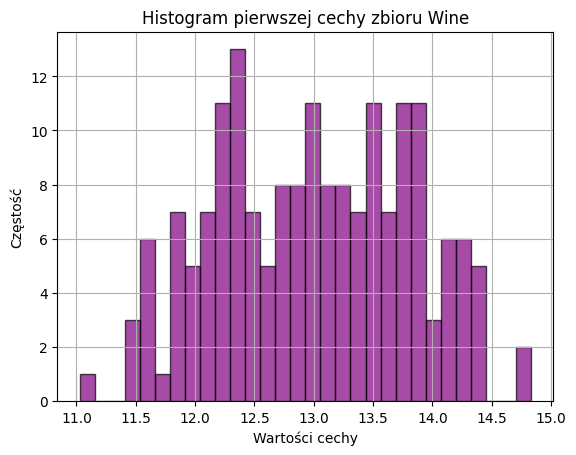

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Wczytanie zbioru danych
wine = load_wine()
dane = wine.data[:, 0]  # Wybieramy pierwszą cechę (Ash) dla przykładu

# Wyrysowanie histogramu
plt.hist(dane, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram pierwszej cechy zbioru Wine')
plt.xlabel('Wartości cechy')
plt.ylabel('Częstość')
plt.grid(True)
plt.show()


Ważny jest także znormalizowany histogram, gdzie normalizujemy by pole danego bina odpowiadało procentowi elementów zbioru które do niego wpadły. Szczególnie przydatne, jak biny o róznej szerokości.

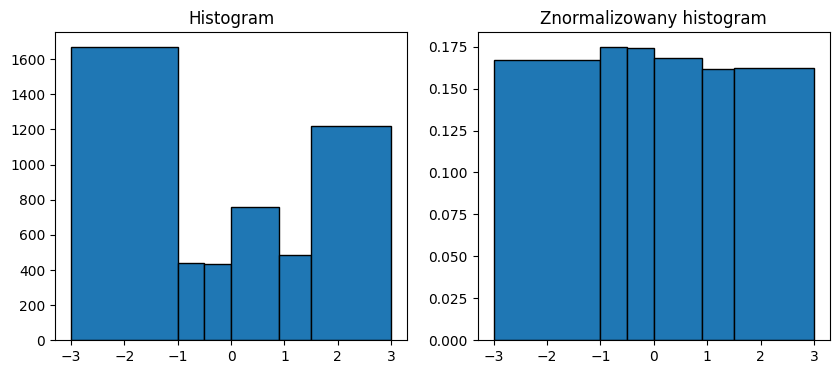

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowe dane
data = np.random.uniform(-3,3,5000)  # Losowe dane z rozkładu jednostajnego na przedziala [-3,3]

# Definiowanie binów o nierównej długości
bins = [-3, -1, -0.5, 0, 0.9, 1.5, 3]

# Rysowanie histogramu
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=bins, edgecolor='black')
plt.title("Histogram")

# Rysowanie znormalizowanego histogramu (gęstość)
plt.subplot(1, 2, 2)
plt.hist(data, bins=bins, edgecolor='black', density=True)
plt.title("Znormalizowany histogram")

plt.show()


# Zadanie - normalizacja danych

Korzystając z poniższego kodu zaimportuj dane **breast cancer**, który składa się z 2 elementów: macierzy  $X$  o wymiarach 569 x 30 oraz wektora  $y$ o długości 569. Macierz  $X$  opisuje badania 683 pacjentów, a wektor  $y$  ich diagnozy.

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y  = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Za pomocą biblioteki **numpy** przenumeruj wektor  $y$ , tzn zamień wartości $0$ i $1$ na $-1$ i $+1$. Przeskaluj macierz  $X$ , tak żeby wartości w każdej kolumnie mieściły się w zakresie  $[0,1]$ , innymi słowy przeskaluj niezależnie każdą kolumnę  $X_i$  według poniższej procedury:

$$
X_i=\frac{X_i-min(X_i)}{max(X_i)-min(X_i)}.
$$

Zadanie: Pokaż, że przy przeskalowaniu danym wzorem
$$
X_i \to \frac{X_i-mean_X}{\sigma_X}
$$
średnia będzie zero, i odchylenie standardowe 1. Pokaż na przykładzie.

In [ ]:
# losujemy 10 liczb z jednakowym prawdopodobieństwem z zakresu liczb 2,3,4
np.random.randint(2,5,10)

array([4, 4, 2, 2, 3, 4, 3, 2, 3, 3])

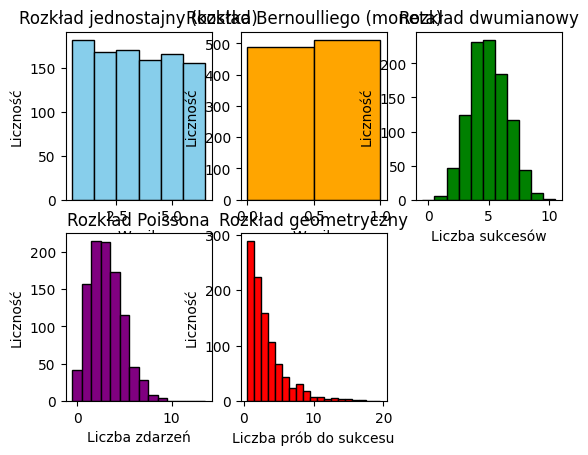

In [ ]:


def simulate_distributions(sample_size=1000):
    """
    Symuluje losowania z kilku popularnych rozkładów dyskretnych i rysuje histogramy.
    :param sample_size: Liczba prób w każdej symulacji.
    """
    # Rozkład jednostajny
    uniform_samples = np.random.randint(1, 7, sample_size)  # Symulacja rzutu kostką
    plt.subplot(2, 3, 1)
    plt.hist(uniform_samples, bins=np.arange(1, 8) - 0.5, edgecolor='black', color='skyblue')
    plt.title("Rozkład jednostajny (kostka)")
    plt.xlabel("Wynik")
    plt.ylabel("Liczność")

    # Rozkład Bernoulliego
    bernoulli_samples = np.random.binomial(1, 0.5, sample_size)  # Symulacja rzutu monetą
    plt.subplot(2, 3, 2)
    plt.hist(bernoulli_samples, bins=2, edgecolor='black', color='orange')
    plt.title("Rozkład Bernoulliego (moneta)")
    plt.xlabel("Wynik")
    plt.ylabel("Liczność")

    # Rozkład dwumianowy
    binomial_samples = np.random.binomial(10, 0.5, sample_size)  # 10 prób z p=0.5
    plt.subplot(2, 3, 3)
    plt.hist(binomial_samples, bins=np.arange(0, 12) - 0.5, edgecolor='black', color='green')
    plt.title("Rozkład dwumianowy")
    plt.xlabel("Liczba sukcesów")
    plt.ylabel("Liczność")

    # Rozkład Poissona
    poisson_samples = np.random.poisson(3, sample_size)  # λ = 3
    plt.subplot(2, 3, 4)
    plt.hist(poisson_samples, bins=np.arange(0, 15) - 0.5, edgecolor='black', color='purple')
    plt.title("Rozkład Poissona")
    plt.xlabel("Liczba zdarzeń")
    plt.ylabel("Liczność")

    # Rozkład geometryczny
    geometric_samples = np.random.geometric(0.3, sample_size)  # p = 0.3
    plt.subplot(2, 3, 5)
    plt.hist(geometric_samples, bins=np.arange(1, 21) - 0.5, edgecolor='black', color='red')
    plt.title("Rozkład geometryczny")
    plt.xlabel("Liczba prób do sukcesu")
    plt.ylabel("Liczność")

    # Poprawienie układu wykresów
#    plt.tight_layout()
    plt.show()


# Uruchomienie programu
simulate_distributions()


#Log-likelihood

Wylosowaliśmy próbkę rzucając monetą wyniki O,R,O,R,R,O,R
Pytanie z jakim prawdopodobieństwem losujemy orła O?

Może 1/2? a może 3/7?

Prawidłowe podejście polega na wzięciu modelu probabilistycznego -- zakładamy, że O losujemy z prawd. $p$, i R z $(1-p)$. Oceniamy wyliczając log-likelihood tej próbki (czyli prawdopoodbieństwo, że uzyskaliśmy te wyniki). Ono wynosi
$$
L=p(O,R,O,R,R,O,R)=p(O) \cdot p(R) \cdot \ldots \cdot P(R)=p^3 \cdot (1-p)^4.
$$
Finalnie interesuje nas to $p$ które to maksymalizuje, czylu
$$
\mathrm{argmax}_p p^3 \cdot (1-p)^4.
$$
W celu minimalizacji obkłada się logarytmem, log-likelihood:
$$
LL= 3 \log p +4 \log (1-p).
$$
Teraz łatwo sprawdzić, że maksimum jest dla $p=3/7$.





In [ ]:
0.5**7

0.0078125

In [ ]:
(3/7)**3*(4/7)**4

0.008393004372570708

***ZADANIE***
Strzelając z łuku do tarczy (aż do trafienia w tarczę), trafiłem raz po raz pierwszy z 3 razem, następnie za 5 razem a finalnie za 2 razem (modeluję używając rozkład geometryczny). Proszę wyliczyć (wyestymować) jakie jest oczekiwane trafienie w tarczę przy jednym strzale z łuku.

# Rozkłady ciągłe jednowymiarowe

Definiuje się rozkład prawdopodobieństwa za pomocą całki (pole pod wykresem dla dodatnich):
$$
p(A)=\int_A f(x) \, dx,
$$
gdzie $f$ jest nieujemną funkcją która się całkuje do $1$.

In [ ]:
# rozkład jednostajny na przedziale $[a,b]$
# Losowanie 10 liczb z rozkładu jednostajnego (domyślnie z przedziału [0, 1))
# biblioteka numpy

np.random.seed(42)  # Ustawienie ziarna -- powtarza wyniki, dowolna liczba, może być zero
print(np.random.uniform(0, 1, 10))


[0.11959425 0.71324479 0.76078505 0.5612772  0.77096718 0.4937956
 0.52273283 0.42754102 0.02541913 0.10789143]


In [ ]:
# PAKIET SCIPY -- DEDYKOWANY TAKZE DO PRAWDOPOBIENSTWA
# uniform.rvs to funkcja z biblioteki scipy.stats w Pythonie, służąca do generowania losowych próbek z rozkładu jednostajnego.
# Jest częścią bardziej ogólnego modułu scipy.stats, który obsługuje różne typy rozkładów.

from scipy.stats import uniform

print(uniform.rvs(loc=0, scale=1, size=num_samples,random_state=None))

sample = uniform.rvs()
print(sample)

samples = uniform.rvs(loc=0, scale=10, size=10)
print(samples)

from scipy.stats import uniform

samples = uniform.rvs(loc=-3, scale=6, size=(2, 5))
print(samples)

0.23179204051264823


Różnice w stosunku do numpy.random.uniform:
scipy.stats.uniform jest bardziej wszechstronny, ponieważ jest częścią całej rodziny narzędzi do pracy z rozkładami w scipy.stats.
Można korzystać z dodatkowych funkcji, takich jak:
pdf (funkcja gęstości prawdopodobieństwa).
cdf (funkcja dystrybuanty).
ppf (odwrotna dystrybuanta).
numpy.random.uniform jest prostsze i służy wyłącznie do generowania liczb losowych.








In [ ]:
# rozkład normalny
norm.rvs(loc=0, scale=1, size=10)

array([ 1.44837492,  0.88281215,  0.25515012,  0.34398361,  0.55685437,
        0.22456   , -0.26093413, -0.21354231, -0.28163808, -1.78335604])

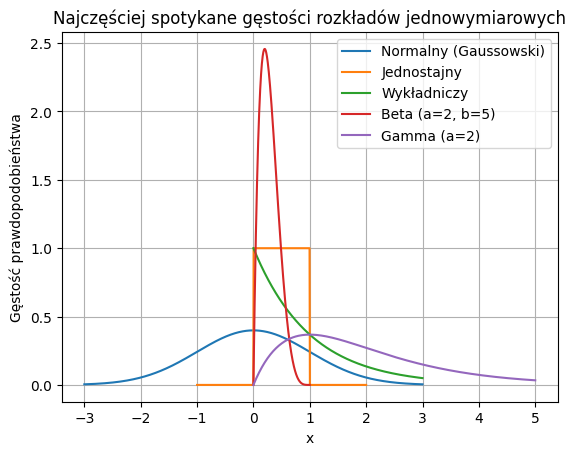

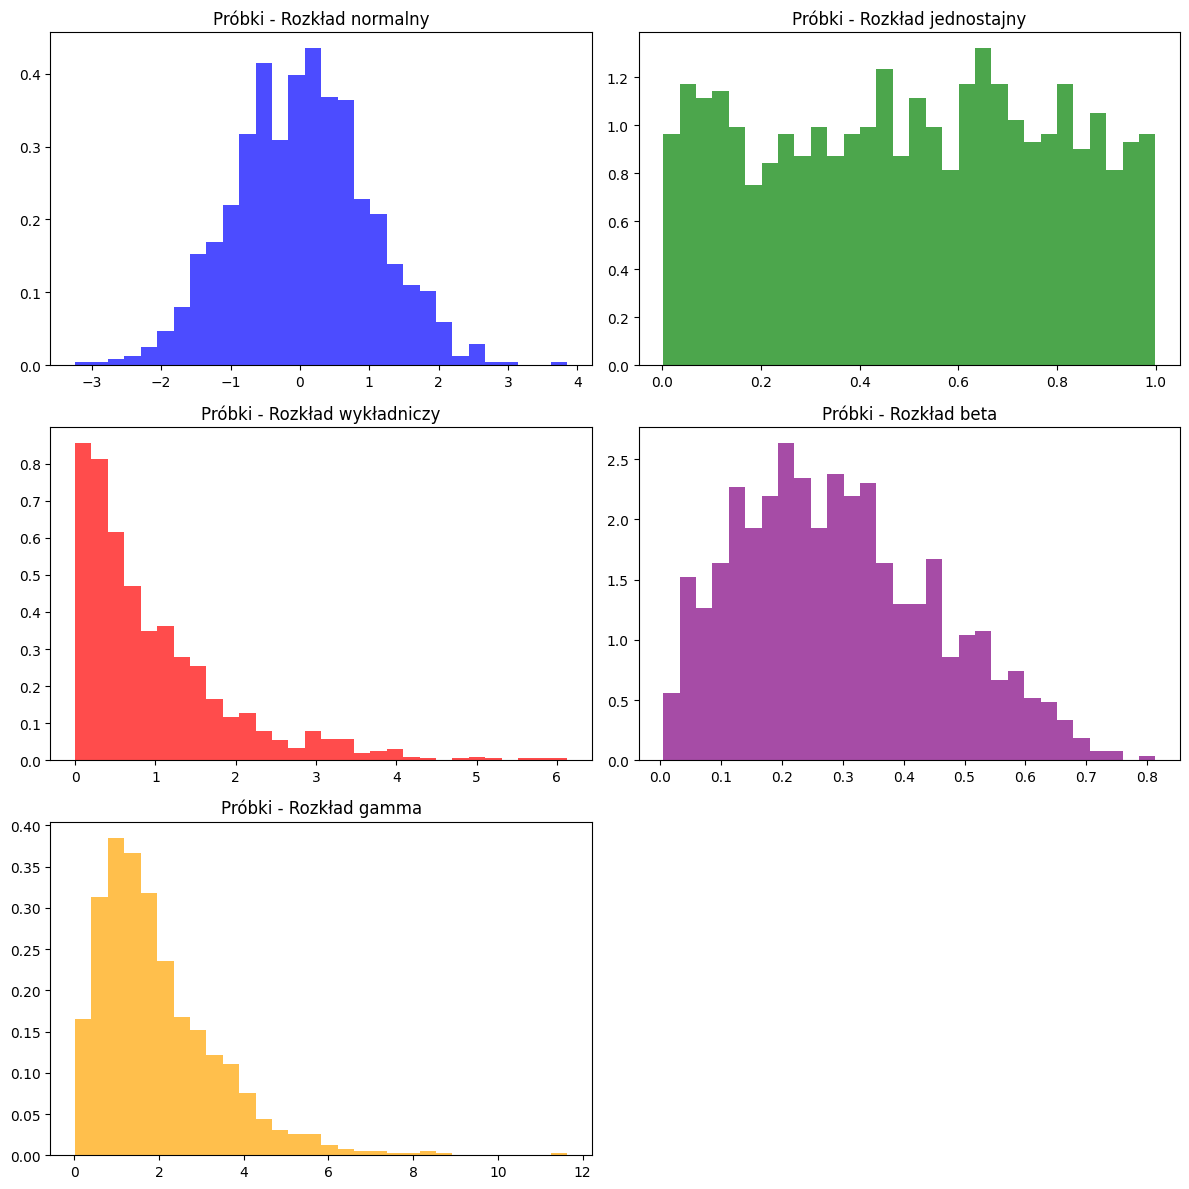

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, beta, gamma

def plot_distributions():
    x = np.linspace(-3, 3, 500)

    # Rozkład normalny (Gaussa)
    plt.plot(x, norm.pdf(x, loc=0, scale=1), label='Normalny (Gaussowski)')

    # Rozkład jednostajny
    x_uniform = np.linspace(-1, 2, 500)
    plt.plot(x_uniform, uniform.pdf(x_uniform, loc=0, scale=1), label='Jednostajny')

    # Rozkład wykładniczy
    x_expon = np.linspace(0, 3, 500)
    plt.plot(x_expon, expon.pdf(x_expon, scale=1), label='Wykładniczy')

    # Rozkład beta
    x_beta = np.linspace(0, 1, 500)
    plt.plot(x_beta, beta.pdf(x_beta, a=2, b=5), label='Beta (a=2, b=5)')

    # Rozkład gamma
    x_gamma = np.linspace(0, 5, 500)
    plt.plot(x_gamma, gamma.pdf(x_gamma, a=2, scale=1), label='Gamma (a=2)')

    # Ustawienia wykresu
    plt.title('Najczęściej spotykane gęstości rozkładów jednowymiarowych')
    plt.xlabel('x')
    plt.ylabel('Gęstość prawdopodobieństwa')
    plt.legend()
    plt.grid()
    plt.show()

def sample_distributions():
    # Liczba próbek
    num_samples = 1000

    # Próby z różnych rozkładów
    samples_normal = norm.rvs(loc=0, scale=1, size=num_samples)
    samples_uniform = uniform.rvs(loc=0, scale=1, size=num_samples)
    samples_expon = expon.rvs(scale=1, size=num_samples)
    samples_beta = beta.rvs(a=2, b=5, size=num_samples)
    samples_gamma = gamma.rvs(a=2, scale=1, size=num_samples)

    # Wyświetlenie histogramów próbek
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    axs[0, 0].hist(samples_normal, bins=30, density=True, alpha=0.7, color='blue')
    axs[0, 0].set_title('Próbki - Rozkład normalny')

    axs[0, 1].hist(samples_uniform, bins=30, density=True, alpha=0.7, color='green')
    axs[0, 1].set_title('Próbki - Rozkład jednostajny')

    axs[1, 0].hist(samples_expon, bins=30, density=True, alpha=0.7, color='red')
    axs[1, 0].set_title('Próbki - Rozkład wykładniczy')

    axs[1, 1].hist(samples_beta, bins=30, density=True, alpha=0.7, color='purple')
    axs[1, 1].set_title('Próbki - Rozkład beta')

    axs[2, 0].hist(samples_gamma, bins=30, density=True, alpha=0.7, color='orange')
    axs[2, 0].set_title('Próbki - Rozkład gamma')

    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_distributions()
    sample_distributions()


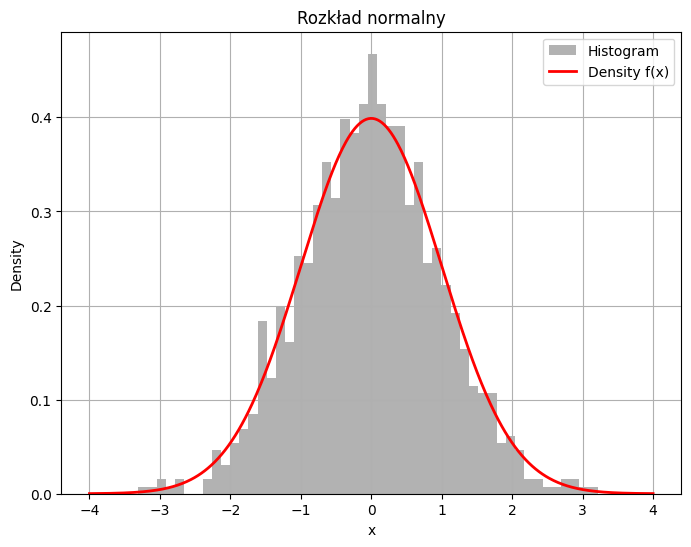

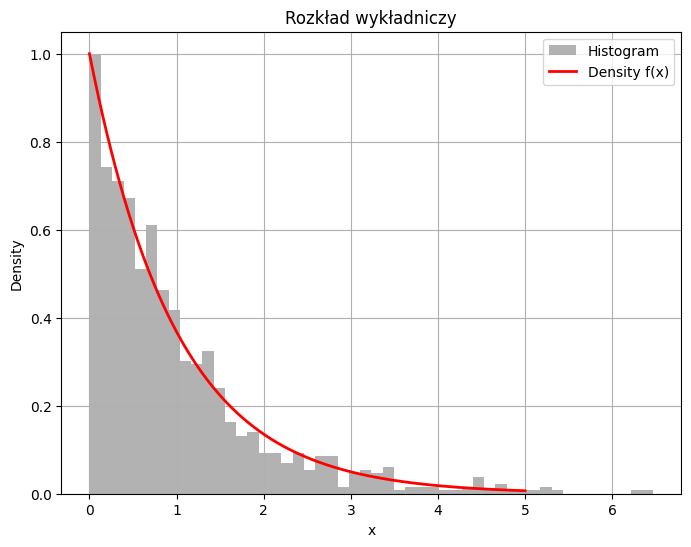

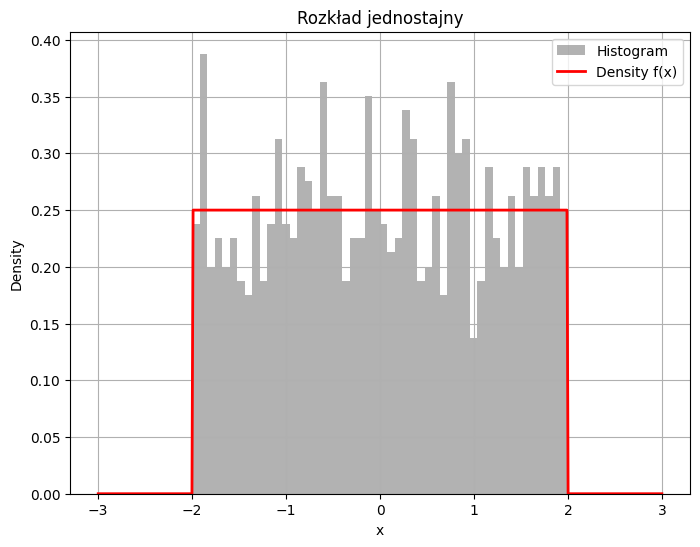

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

def sample_and_plot(f, sampler, num_samples=1000, x_range=(-5, 5), num_bins=50, title="Histogram and Density"):
    """
    Losuje punkty z rozkładu, rysuje histogram i funkcję gęstości.

    Parametry:
    - f: funkcja gęstości prawdopodobieństwa
    - sampler: funkcja losująca próbki
    - num_samples: liczba próbek do wylosowania
    - x_range: zakres osi x do wykresu
    - num_bins: liczba binów histogramu
    - title: tytuł wykresu
    """
    # Losowanie próbek
    samples = sampler(num_samples)

    # Tworzenie wykresu histogramu
    plt.figure(figsize=(8, 6))
    x = np.linspace(x_range[0], x_range[1], 500)

    # Histogram (znormalizowany)
    plt.hist(samples, bins=num_bins, density=True, alpha=0.6, color='gray', label="Histogram")

    # Funkcja gęstości
    plt.plot(x, f(x), 'r-', lw=2, label="Density f(x)")

    # Dodanie szczegółów wykresu
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# Przykład 1: Rozkład normalny
mu, sigma = 0, 1  # Parametry rozkładu normalnego
sample_and_plot(
    f=lambda x: norm.pdf(x, loc=mu, scale=sigma),
    sampler=lambda n: np.random.normal(mu, sigma, size=n),
    num_samples=1000,
    x_range=(-4, 4),
    title="Rozkład normalny"
)

# Przykład 2: Rozkład wykładniczy
lambda_param = 1
sample_and_plot(
    f=lambda x: expon.pdf(x, scale=1/lambda_param),
    sampler=lambda n: np.random.exponential(1/lambda_param, size=n),
    num_samples=1000,
    x_range=(0, 5),
    title="Rozkład wykładniczy"
)

# Przykład 3: Rozkład jednostajny
a, b = -2, 2
sample_and_plot(
    f=lambda x: np.where((x >= a) & (x <= b), 1 / (b - a), 0),
    sampler=lambda n: np.random.uniform(a, b, size=n),
    num_samples=1000,
    x_range=(-3, 3),
    title="Rozkład jednostajny"
)


# Zadanie
Załóżmy, że mamy podane prawdopodobieństa  pi . Chcemy wylosować zgodnie z tym rozkładem. Wtedy losujemy z rozkładu jednostajnego na  [0,1] , i jeżeli wynik nalezy do  [sum(p,0:k−1),sum(p,0:k)]  to zwracamy  k . Zaimplementuj jako funkcję, która przyjmuje  p  i ilość elementów do wylosowania.

# Zadanie


## Reguła Trzech Sigm
Reguła Trzech Sigm dla danego rozkładu normalnego $N(mean,\sigma)$ oznacza, że w przedziale $[mean-3\sigma,mean+3\sigma]$ znajduje się 99.7\% wszystkich obserwacji.

Napisz program, który:

  * rysuje gęstość rozkładu normalnego o zadanych parametrach $mean$ i $\sigma$,
  * wylicza pole pod krzywą
  * zaznacza obszar po krzywą

Policz prawdopodobieństwa:

  * $P(X \in [mean-\sigma,mean+\sigma])$
  * $P(X \in [mean-2\sigma,mean+2\sigma])$
  * $P(X \in [mean-3\sigma,mean+3\sigma])$



0.682689492137086
0.9544997361036417
0.9973002039367399


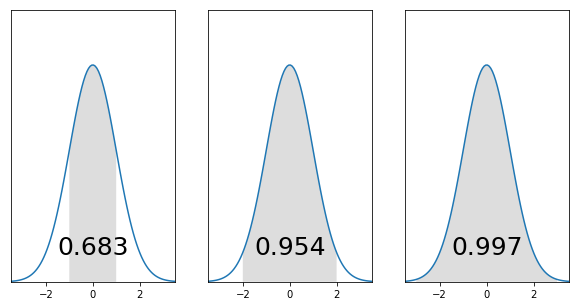